## 1. Installation of the required libraries

In [1]:
# Import the pandas library for data manipulation and analysis
import pandas as pd

# Import the numpy library for numerical operations and array handling
import numpy as np

# Import matplotlib.pyplot for creating static, interactive, and animated visualizations
import matplotlib.pyplot as plt

# Import seaborn for making statistical graphics and enhancing data visualizations
import seaborn as sns

# Ensure that plots are displayed inline within Jupyter notebooks or IPython environments
%matplotlib inline


## 2. Load the dataset

In [4]:
# Define the path to the dataset
file_path = 'C:/F/ml_projexts/ML_Learning_Journey/datasets/USA_Housing.csv'

# Load the dataset into a DataFrame
USAhousing = pd.read_csv(file_path)

# Display the first few rows of the dataset to verify it's loaded correctly
USAhousing.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [10]:
# USAhousing.shape[1] # number of columns
# USAhousing.shape[0] # number of rows
USAhousing.shape # number of rows and columns

(5000, 7)

In [13]:
# .info() function to get a concise summary of the dataset
USAhousing.info() # information about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [14]:
# .describe() function to generate descriptive statistics, such as mean, standard deviation,
# and quartiles, providing a deeper understanding of the numerical features in the dataset.

USAhousing.describe() # statistical summary of the dataset

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


#### Summary Statistics Breakdown

- **count**:
  - The number of non-null entries in each column. In this case, every column has 5000 entries.

- **mean**:
  - The average value of each column. For example, the average area income is $68,583, and the average price of the houses is $1,232,073.

- **std (Standard Deviation)**:
  - Measures the amount of variation or dispersion of the values. A higher standard deviation indicates that the values are more spread out from the mean. For instance, the standard deviation of `Avg. Area Income` is $10,657, indicating variability in income levels.

- **min**:
  - The minimum value in each column. For `Avg. Area Income`, the minimum value is $17,797.

- **25% (25th Percentile or First Quartile)**:
  - The value below which 25% of the data falls. For example, 25% of the `Avg. Area Income` values are below $61,481.

- **50% (Median or 50th Percentile)**:
  - The middle value of the dataset, where 50% of the values are below and 50% are above. For `Avg. Area Income`, the median is $68,804.

- **75% (75th Percentile or Third Quartile)**:
  - The value below which 75% of the data falls. For example, 75% of the `Avg. Area Income` values are below $75,783.

- **max**:
  - The maximum value in each column. For `Avg. Area Income`, the maximum value is $107,702.


## 3. Feature Engineering, Correlation, and Heatmaps

**Feature Engineering**:
- **Purpose**: Creating or modifying features to enhance model performance by transforming raw data into useful inputs.
- **Example**: Calculating "price per square foot" from "price" and "size" features to better capture the relationship between house size and price.

**Correlation**:
- **Purpose**: Measures the relationship between two variables, showing how changes in one feature affect another.
- **Example**: A high positive correlation between "house size" and "house price" indicates that larger houses generally cost more.

**Heatmap**:
- **Purpose**: Visualizes data using colors to show relationships and correlations between features.
- **Example**: A heatmap of feature correlations helps identify strong relationships between features and the target variable.


In [20]:
# Drop the 'Address' column
USAhousing = USAhousing.drop(columns=['Address'])

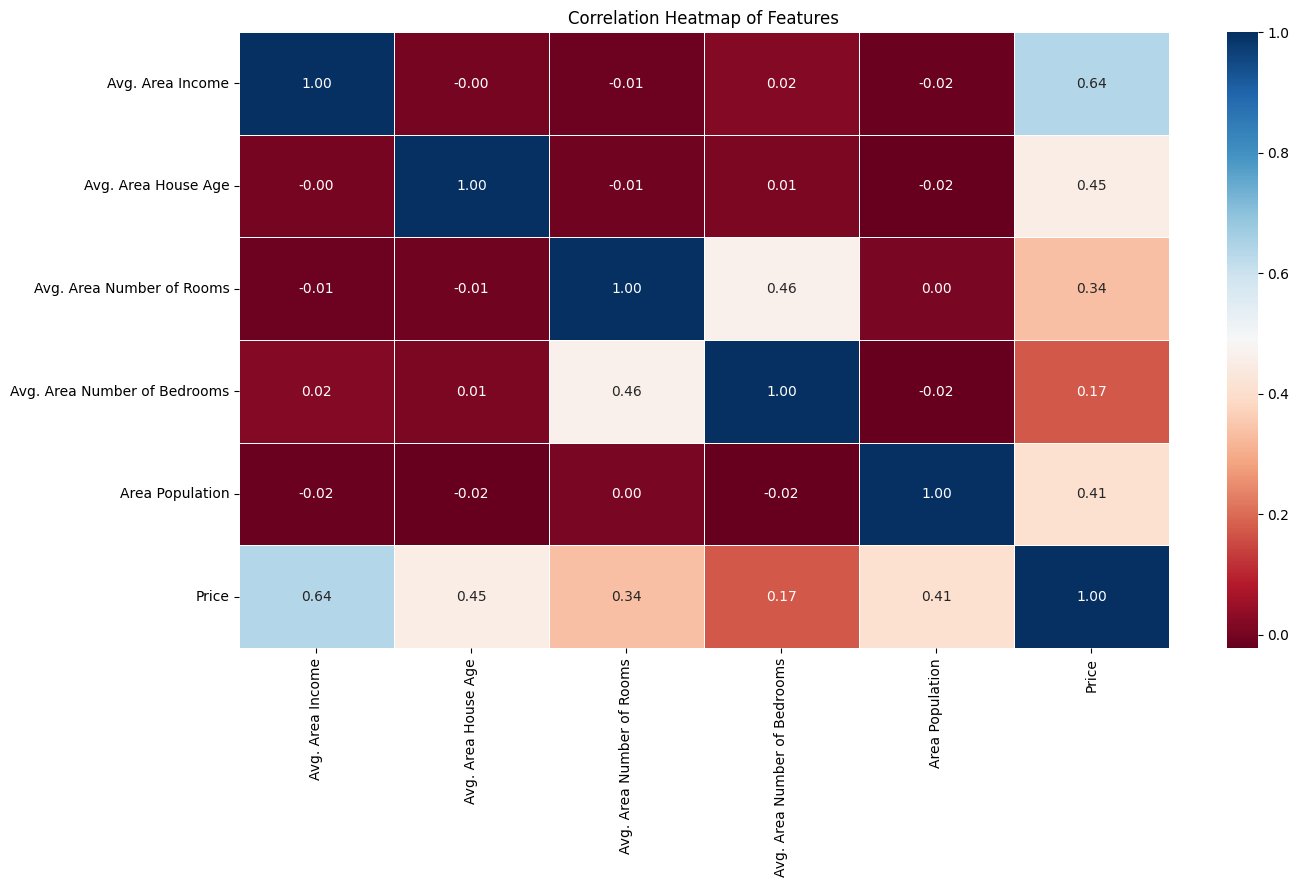

In [36]:
# Assuming you have loaded your dataset into 'USAhousing'
# Calculate the correlation matrix
correlation_matrix = USAhousing.corr()

# Create the figure and axis
plt.figure(figsize=(15, 8))

# Create the heatmap
sns.heatmap(
    correlation_matrix,            # Data: The correlation matrix
    annot=True,                     # Show the correlation coefficients in the heatmap
    cmap='RdBu',                # Color map to use for the heatmap
    fmt='.2f',                      # Format of the annotations (2 decimal places)
    linewidths=0.5               # Width of the lines that will divide each cell
)

# Set title and labels
plt.title('Correlation Heatmap of Features')

# Show the plot
plt.show()


### Price Feature Correlation Analysis

The `Price` feature correlations with other features are as follows:

- **Avg. Area Income (0.64)**: There is a strong positive correlation between `Price` and `Avg. Area Income`, suggesting that higher average income in an area is associated with higher house prices.

- **Avg. Area House Age (0.45)**: A moderate positive correlation indicates that as the average age of houses in an area increases, house prices also tend to increase, although the relationship is not as strong as with income.

- **Avg. Area Number of Rooms (0.34)**: There is a moderate positive correlation between `Price` and `Avg. Area Number of Rooms`, meaning that more rooms in an area are associated with higher house prices.

- **Avg. Area Number of Bedrooms (0.17)**: A weak positive correlation shows that the number of bedrooms has a minor impact on house prices compared to other features.

- **Area Population (0.41)**: A moderate positive correlation suggests that as the population in an area grows, house prices tend to rise, although this effect is less pronounced than income.

In summary, `Avg. Area Income` has the strongest correlation with `Price`, indicating it is a key determinant of house prices. Other features like house age and population also have notable correlations, but to a lesser extent.


### Scatter Plots for Feature Analysis

Scatter plots are used to visualize the relationship between two variables. In this analysis, we are plotting the `Price` of houses against several features to understand how each feature affects house prices. Here’s what each scatter plot shows:

- **Avg. Area Income vs. Price**: This plot helps us understand the relationship between average income in an area and house prices. We expect to see a trend where higher income levels correspond to higher house prices, as indicated by the strong positive correlation.

- **Avg. Area House Age vs. Price**: This plot examines how the average age of houses in an area affects house prices. We expect to observe a moderate positive trend, meaning that as the average house age increases, house prices tend to rise as well.

- **Avg. Area Number of Rooms vs. Price**: This plot shows the relationship between the number of rooms in an area and house prices. We anticipate a moderate positive relationship, where more rooms are associated with higher prices.

By creating these scatter plots, we aim to visually confirm the correlations observed in the data. This helps in understanding the nature of these relationships, which is crucial for feature selection and model building in machine learning.


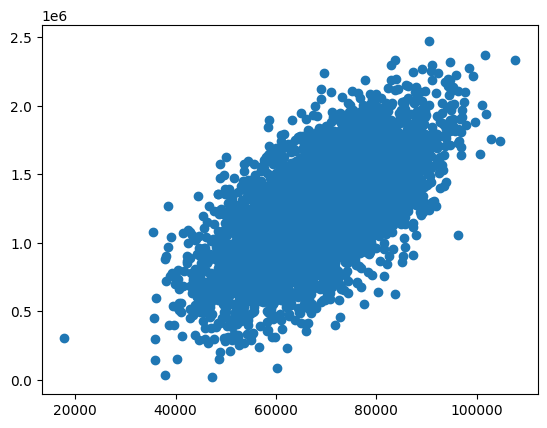

In [44]:
# Create a pairplot to visualize the relationships between the feature Average Area Income and the target Price
plt.scatter(USAhousing['Avg. Area Income'],USAhousing['Price'])

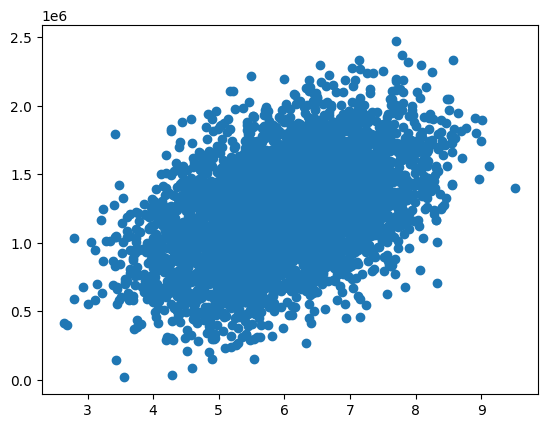

In [45]:
# Create a pairplot to visualize the relationships between the feature Average Area House Age and the target Price
plt.scatter(USAhousing['Avg. Area House Age'],USAhousing['Price'])

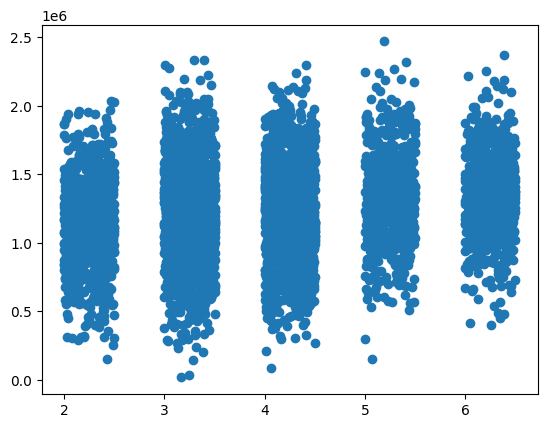

In [47]:
# Create a pairplot to visualize the relationships between the feature Average Area Number of Bedrooms and the target Price
plt.scatter(USAhousing['Avg. Area Number of Bedrooms'],USAhousing['Price'])

### Understanding `seaborn.pairplot`

The `seaborn.pairplot` function is a powerful tool for visualizing relationships between pairs of features in a dataset. It creates a grid of scatter plots and histograms that allow us to see both individual distributions and relationships between features. Here’s a breakdown of how it works:

- **Purpose**: The `pairplot` function helps in understanding the relationships and distributions of multiple variables in a dataset. It is especially useful for exploratory data analysis to identify patterns, correlations, and potential outliers.

- **Components**:
  - **Scatter Plots**: In the grid, scatter plots show how each pair of features is related. For example, if you plot `Feature A` against `Feature B`, you can see if there is any trend or correlation between them.
  - **Histograms/Kernel Density Estimates (KDE)**: On the diagonal of the grid, `pairplot` displays histograms or KDE plots for each feature individually, showing the distribution of that feature.

- **Example Usage**:
  Suppose you want to explore how different features in your dataset relate to each other and to identify any interesting patterns. You can use `pairplot` to achieve this. Here’s a simple example:

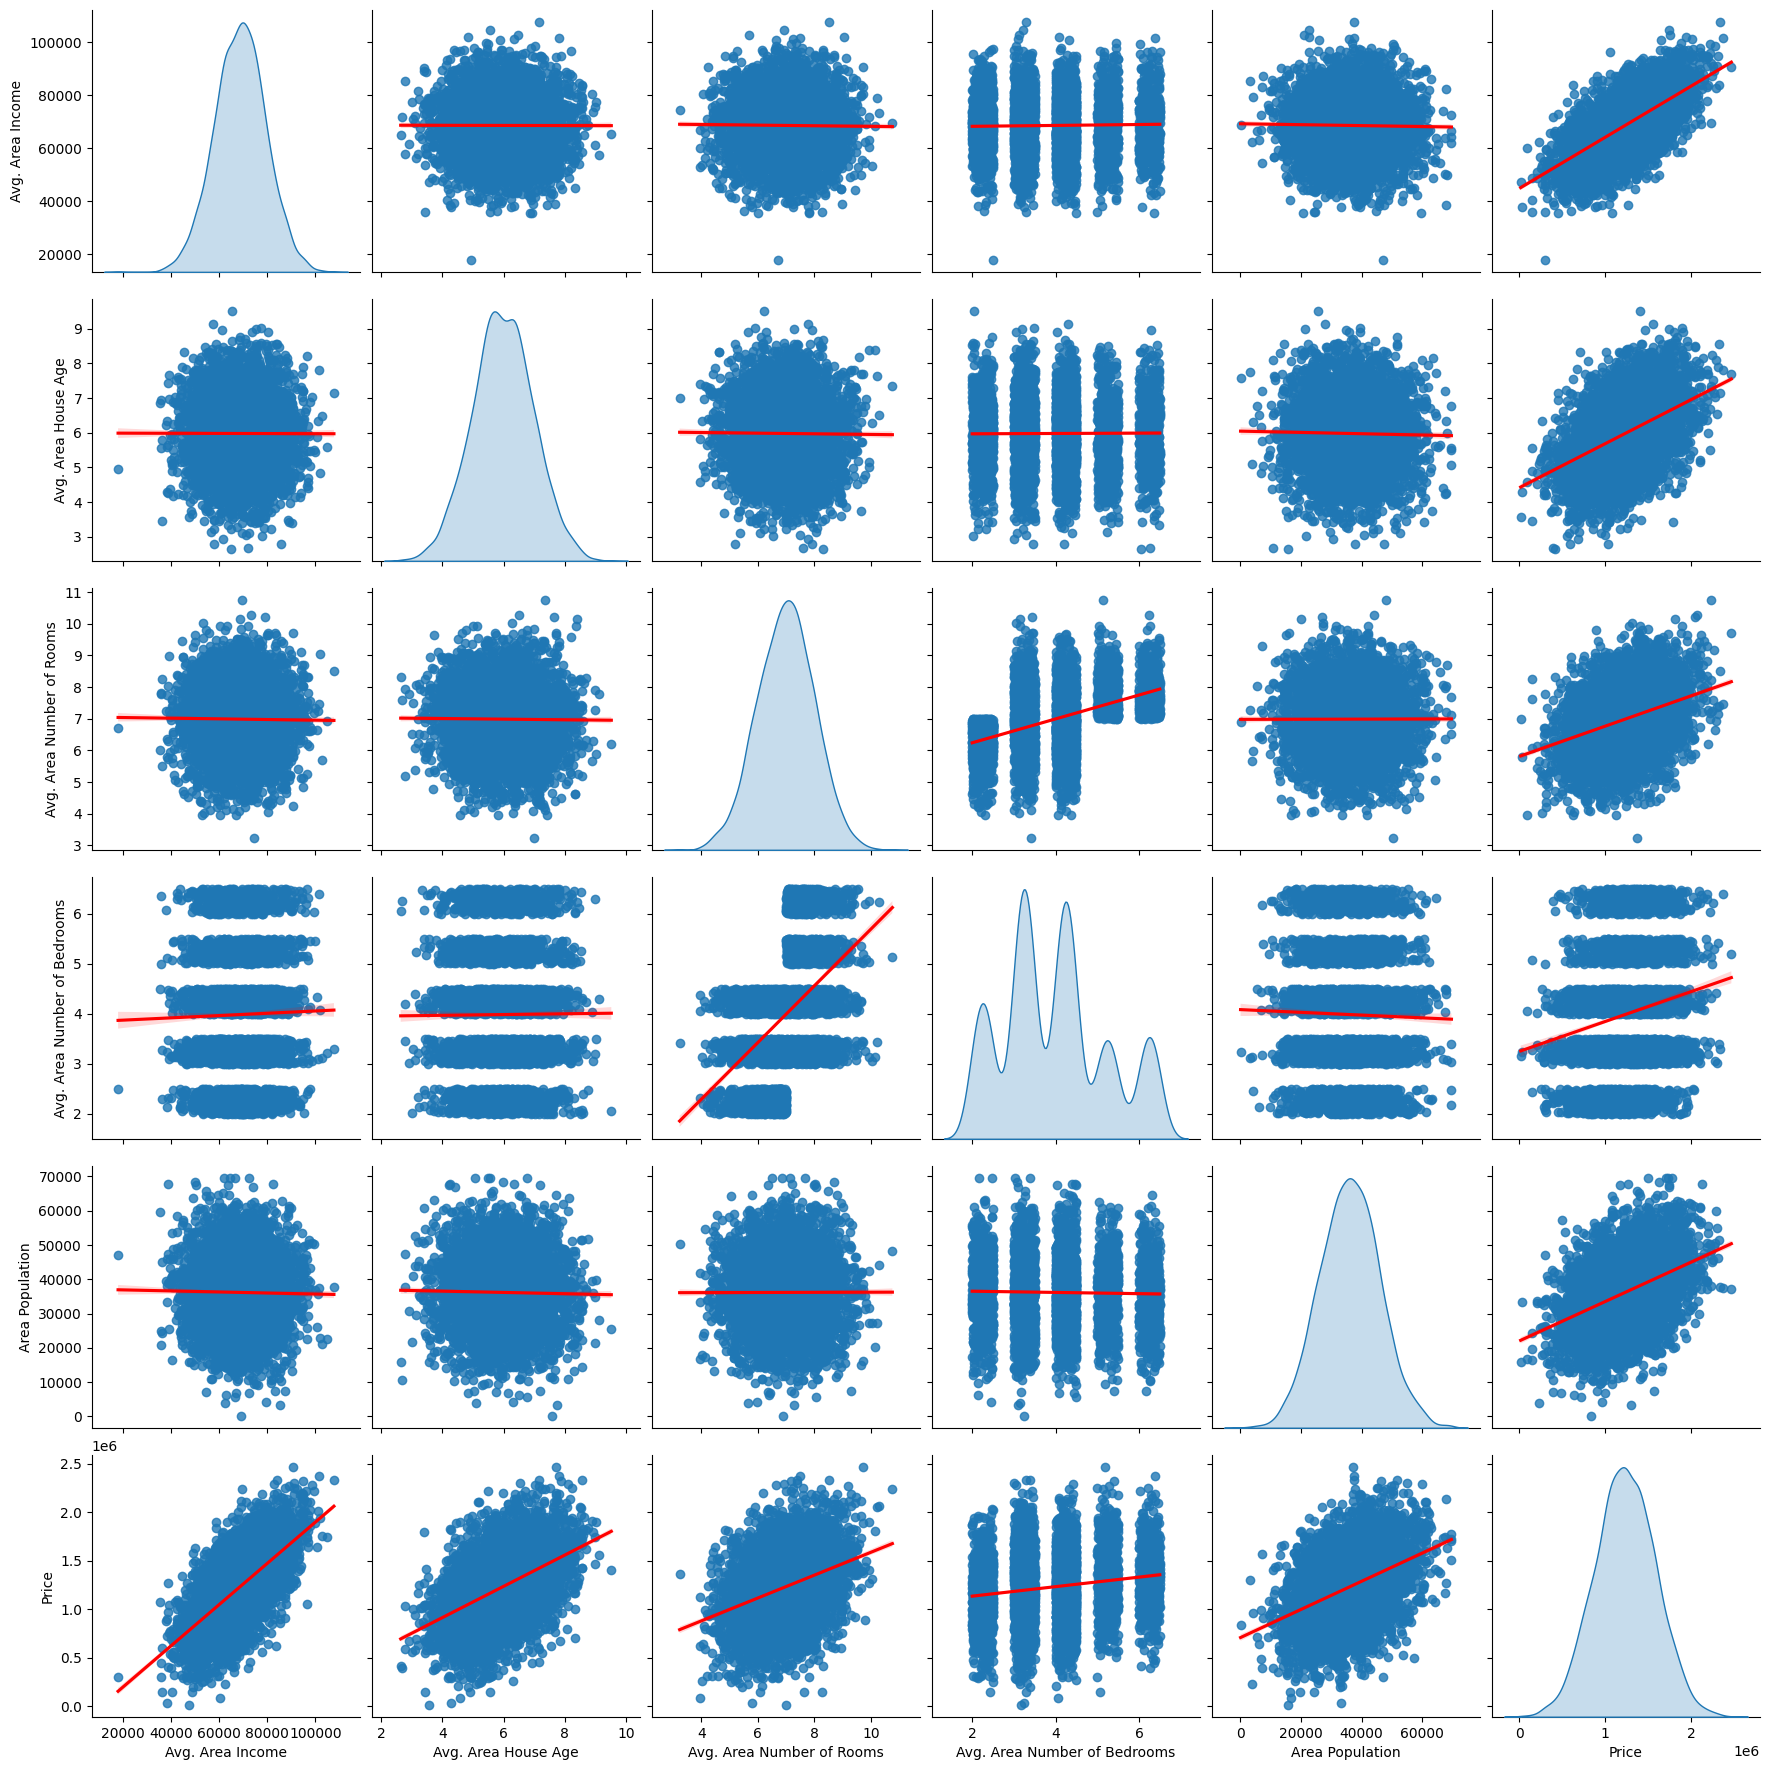

In [56]:
# Advanced Pairplot Analysis of USAhousing Dataset

# Create a pairplot with customized settings:
sns.pairplot(
    USAhousing,                         # Dataset to be used for pairplot
    diag_kind='kde',                    # Use Kernel Density Estimate (KDE) for diagonal plots
    height=3,                           # Set the height of each plot to 3 inches for better readability
    kind='reg',                         # Add regression lines to scatter plots for visualizing linear relationships
    plot_kws={'line_kws': {'color': 'red'}}  # Customize regression line color to red for better visibility
)

# Explanation:
# 1. 'diag_kind=kde' replaces the default histograms with KDE plots on the diagonals, giving a smoother view of the distributions.
# 2. 'height=3' sets the size of each subplot to 3 inches, ensuring clarity in the visualization.
# 3. 'kind=reg' adds regression lines to the scatter plots, helping to highlight the linear relationships between pairs of features.
# 4. 'plot_kws' allows us to pass additional parameters to customize the plots, in this case, making the regression lines red for emphasis.


<Axes: xlabel='Price', ylabel='Count'>

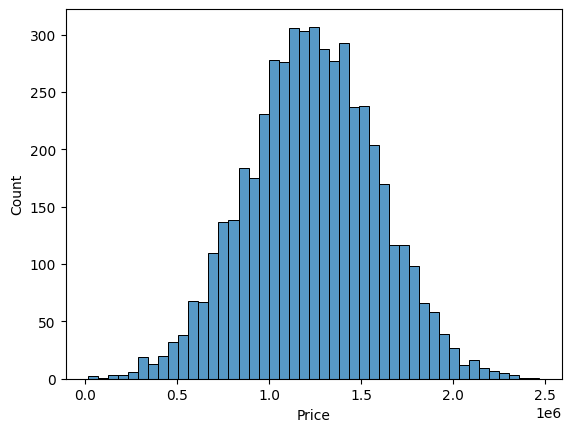

In [58]:
sns.histplot(USAhousing['Price'])

### **Model Selection**
- **Linear Regression** is chosen for its simplicity and interpretability in predicting house prices. It assumes a linear relationship between features and the target variable.

### **Features**
- **Avg. Area Income**: Average income of the area.
- **Avg. Area House Age**: Average age of the houses.
- **Avg. Area Number of Rooms**: Average number of rooms in houses.
- **Avg. Area Number of Bedrooms**: Average number of bedrooms.
- **Area Population**: Population of the area.

The model will be trained to predict house prices based on these features, with a focus on understanding their impact on the target variable.


In [69]:
# Define the features (X) and target variable (y) for the model

# Features: These columns represent the input variables used to predict the target variable
X = USAhousing[['Avg. Area Income',  # Average income in the area
                'Avg. Area House Age',  # Average age of houses in the area
                'Avg. Area Number of Rooms',  # Average number of rooms in the houses
                'Avg. Area Number of Bedrooms',  # Average number of bedrooms in the houses
                'Area Population']]  # Population of the area

# Target Variable: The column we want to predict
y = USAhousing['Price']  # Price of the houses


## 4. Splitting the Data

In [67]:
# Import the train_test_split function from sklearn
from sklearn.model_selection import train_test_split

In [70]:
# Split the dataset into training and testing sets
# 80% of the data will be used for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X,          # Features
    y,          # Target variable
    test_size=0.2,  # Proportion of the data to be used as the test set (20%)
    random_state=42  # Seed for random number generator to ensure reproducibility
)


## 5. Importing and Training the Model

In [64]:
from sklearn.linear_model import LinearRegression

In [65]:
lm = LinearRegression()

In [71]:
lm.fit(X_train,y_train)

LinearRegression()

In [72]:
predictions = lm.predict(X_test)

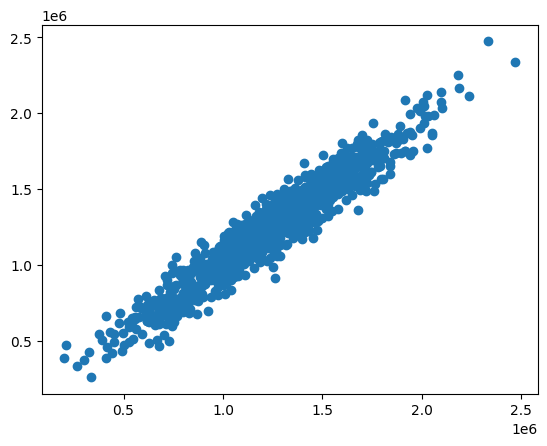

In [73]:
plt.scatter(y_test,predictions)

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)    # Mean Absolute Error
mse = mean_squared_error(y_test, predictions)      # Mean Squared Error
rmse = np.sqrt(mse)                                # Root Mean Squared Error
r2 = r2_score(y_test, predictions)                 # R-squared

# Print the results
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 80879.09723489822
Mean Squared Error (MSE): 10089009300.894522
Root Mean Squared Error (RMSE): 100444.06055558746
R-squared (R²): 0.9179971706834288


### Interpretation of Results

- **Mean Absolute Error (MAE)**: $80,879  
  - On average, the model's predictions are off by about $80,879 from the actual house prices.

- **Mean Squared Error (MSE)**: $10,089,009,300.89  
  - The squared differences between the predicted and actual prices are large, indicating some significant errors.

- **Root Mean Squared Error (RMSE)**: $100,444  
  - The typical prediction error is about $100,444, providing a rough estimate of the average error magnitude.

- **R-squared (R²)**: 0.918  
  - The model explains approximately 91.8% of the variance in house prices, indicating a strong fit.


## 7. Analyze Predictions

### Predicted vs. Actual Values Plot

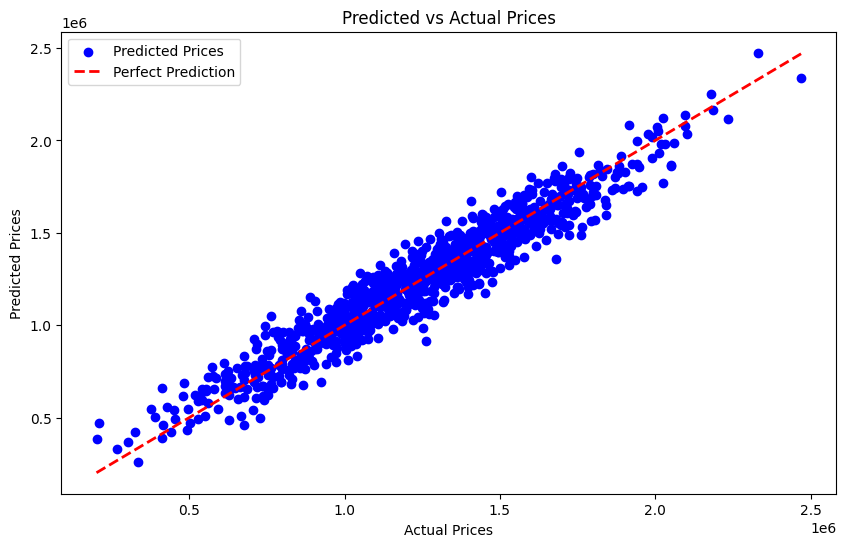

In [82]:
# This scatter plot will help us see how close the predicted values are to the actual values.

# Plotting the predicted vs actual values with different markers and colors
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted values
plt.scatter(y_test, predictions, color='blue', label='Predicted Prices')

# Line of perfect prediction
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', lw=2, label='Perfect Prediction')

# Adding labels and title
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Predicted vs Actual Prices')

# Adding a legend to distinguish between actual and predicted points
plt.legend()

# Display the plot
plt.show()


### Residual Plot

**Ideally, residuals should be normally distributed around zero.**

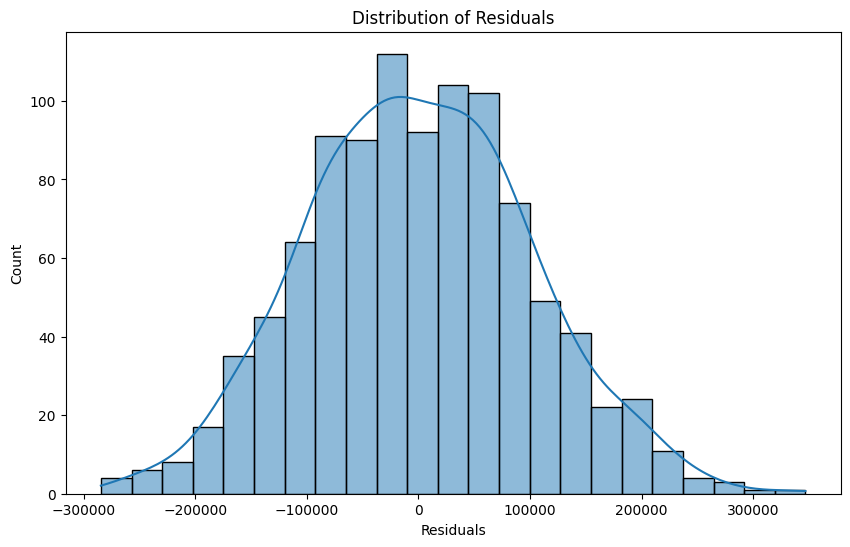

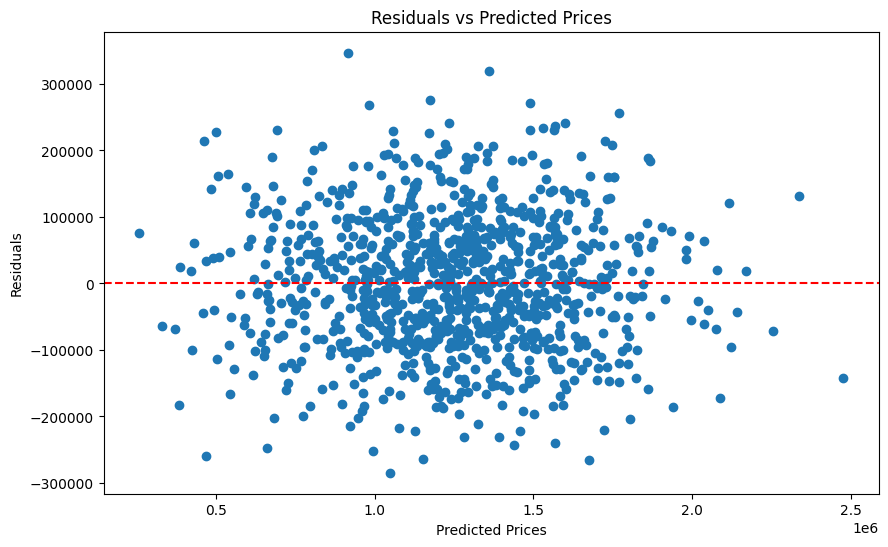

In [86]:
# Calculate Residuals
# Residuals are the differences between the actual and predicted values.
# They help us understand how well the model is performing for each prediction.
residuals = y_test - predictions

# Plotting the Distribution of Residuals
plt.figure(figsize=(10, 6))  # Set the figure size for the plot

# Histogram of residuals with a Kernel Density Estimate (KDE) overlay
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')  # X-axis label
plt.title('Distribution of Residuals')  # Plot title
plt.show()  # Display the plot

# Interpretation: 
# A good model will have residuals centered around 0, with a roughly normal distribution.
# If residuals are not centered around 0 or have a skewed distribution, it may indicate model issues.

# Plotting Residuals vs. Predicted Values
plt.figure(figsize=(10, 6))  # Set the figure size for the plot

# Scatter plot of predicted prices vs. residuals
plt.scatter(predictions, residuals)

# Horizontal line at y = 0 to indicate where the residuals should ideally be
plt.axhline(0, color='red', linestyle='--')

# Adding labels and title
plt.xlabel('Predicted Prices')  # X-axis label
plt.ylabel('Residuals')  # Y-axis label
plt.title('Residuals vs Predicted Prices')  # Plot title
plt.show()  # Display the plot

# Interpretation:
# In an ideal scenario, the residuals should be randomly scattered around 0.
# Patterns or trends in this plot may suggest areas where the model could be improved.


## 8. Feature Importance

### Understanding Coefficients in Linear Regression

In linear regression, coefficients represent the relationship between each feature (input variable) and the target variable (output). 
Each coefficient quantifies how much the target variable is expected to change when that feature changes by one unit, while all other features are held constant.

**Key Points:**

- **Positive Coefficient**: Indicates that as the feature increases, the target variable also increases.
- **Negative Coefficient**: Indicates that as the feature increases, the target variable decreases.
- **Magnitude**: The absolute value of the coefficient shows the strength of the relationship. Larger absolute values mean a stronger impact on the target variable.


In [88]:
# Step 1: Extract the Coefficients
coefficients = lm.coef_

# Step 2: Pair Coefficients with Feature Names
features = X.columns
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Step 3: Display the Feature Importance
print(feature_importance.sort_values(by='Coefficient', ascending=False))

# Interpretation:
# - Positive coefficients indicate that as the feature increases, the house price increases.
# - Negative coefficients indicate that as the feature increases, the house price decreases.
# - The magnitude (absolute value) of the coefficient indicates the strength of the relationship.

                        Feature    Coefficient
1           Avg. Area House Age  164666.480722
2     Avg. Area Number of Rooms  119624.012232
3  Avg. Area Number of Bedrooms    2440.377611
0              Avg. Area Income      21.652206
4               Area Population      15.270313


### Coefficient Interpretation

Here are the coefficients from the linear regression model and their interpretation:

- **Avg. Area House Age: 164,666.48**
  - For each additional year in the average area house age, the house price increases by approximately $164,666.48, assuming all other factors remain constant.

- **Avg. Area Number of Rooms: 119,624.01**
  - For each additional room in the average area, the house price increases by approximately $119,624.01, while keeping other features constant.

- **Avg. Area Number of Bedrooms: 2,440.38**
  - For each additional bedroom in the average area, the house price increases by approximately $2,440.38, assuming other features are unchanged.

- **Avg. Area Income: 21.65**
  - For each additional unit increase in the average area income, the house price increases by approximately $21.65, with other factors held constant.

- **Area Population: 15.27**
  - For each additional unit increase in the area population, the house price increases by approximately $15.27, assuming all other variables are constant.

In summary, **Avg. Area House Age** and **Avg. Area Number of Rooms** have the highest impact on house prices, while **Avg. Area Number of Bedrooms**, **Avg. Area Income**, and **Area Population** have relatively smaller impacts.


## 9. Cross-Validation

### Cross-Validation Explained with Example

**Cross-Validation** is a technique used to assess the performance of a machine learning model and ensure that it generalizes well to unseen data. Here's how it works and why it's important, using your house price prediction example:

**Example:**

1. **Dataset**: You have a dataset with features like Avg. Area Income, Avg. Area House Age, and so on, and a target variable Price.

2. **Goal**: You want to build a linear regression model to predict house prices and ensure it performs well on new, unseen data.

3. **Cross-Validation Process**:
   - **Split Data**: The dataset is split into `k` parts or "folds" (commonly 5 or 10). For example, with 5-fold cross-validation, the data is divided into 5 subsets.
   - **Training and Testing**:
     - In each of the `k` iterations, the model is trained on `k-1` folds and tested on the remaining fold.
     - For instance, if the dataset is split into 5 folds, the model will be trained on 4 folds and tested on the 1 remaining fold. This process is repeated 5 times, each time using a different fold as the test set and the remaining folds for training.
   - **Performance Evaluation**:
     - The model's performance is measured (e.g., using Mean Squared Error) on each test fold.
     - These performance metrics are averaged to give a final performance score.

**Why Use Cross-Validation?**
- **Reduces Overfitting**: By testing the model on different subsets of data, cross-validation helps ensure that the model does not perform well only on a specific training set but generalizes across the entire dataset.
- **Provides Robust Performance Metrics**: The average score from cross-validation gives a more reliable estimate of the model's performance compared to a single train-test split.

**Summary in Your Case:**
- **Model**: Linear Regression for predicting house prices.
- **Process**: Split the dataset into 5 folds, train the model on 4 folds, and test on the remaining fold. Repeat this process 5 times.
- **Outcome**: Average the performance metrics (like MSE) across all folds to get a robust estimate of the model's accuracy.

Cross-validation helps ensure that your house price prediction model is not only fitting well to the training data but is also expected to perform consistently on new, unseen data.


In [90]:
# Initialize the model
model = LinearRegression()

# Perform cross-validation
# cv=5 specifies that we want to split the data into 5 folds
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive MSE
mse_scores = -scores

# Print the cross-validated MSE scores and the average
print("Cross-Validated Mean Squared Error (MSE) Scores:", mse_scores)
print("Average Cross-Validated MSE:", np.mean(mse_scores))


Cross-Validated Mean Squared Error (MSE) Scores: [1.00871044e+10 1.07281092e+10 9.86161630e+09 1.01763147e+10
 1.04153672e+10]
Average Cross-Validated MSE: 10253702371.026007


### Cross-Validation Mean Squared Error (MSE) Interpretation

**Cross-Validated MSE Scores:**
- `[1.00871044e+10, 1.07281092e+10, 9.86161630e+09, 1.01763147e+10, 1.04153672e+10]`

**Average Cross-Validated MSE:**
- `10253702371.026007`

**Explanation:**

1. **MSE Scores for Each Fold:**
   - These numbers represent the Mean Squared Error (MSE) of the linear regression model for each of the 5 folds used in cross-validation. 
   - For instance, the first fold has an MSE of approximately `1.01e+10`, while the third fold has an MSE of approximately `9.86e+09`.

2. **Average MSE:**
   - The average MSE across all folds is approximately `1.03e+10` (or `10,253,702,371`). This value summarizes the model's performance across all test sets.

3. **Interpreting the Numbers:**
   - **MSE Definition**: MSE measures the average squared difference between predicted and actual values. Lower MSE values indicate better model performance, as it means predictions are closer to the actual values.
   - **Good or Bad?**: Whether this MSE is considered good or bad depends on the context and scale of your data. In the context of house prices, where prices can range from hundreds of thousands to millions, an MSE in the range of `10^10` may or may not be acceptable based on how close these predictions are to actual prices.
   - **Decision Criteria**: 
     - **Relative Comparison**: Compare these MSE values to baseline models or previous results. If the MSE is lower than that of a simple baseline model, it suggests that your model is performing well.
     - **Domain Knowledge**: Consider the scale of house prices and what level of error is tolerable. For instance, if the average house price is around `$1,000,000`, an MSE of `10^10` might correspond to an average prediction error of about `$100,000`, which could be acceptable depending on the application.

**Summary:**
The average MSE of `10,253,702,371` indicates the average squared deviation between predicted and actual house prices. To judge if this is good or bad, you need to consider the magnitude of the house prices and compare it to other models or baselines. Lower MSE values generally indicate better model performance.
